In [12]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
from hydramuscle.utils import plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
FILENAME = "2020-09-21-17-22-02-160555"
# METAPATH = "./results/data/meta.txt"

# # Load metadata
# data = pd.read_csv(METAPATH, sep="\s+")
# print(data.Metadata[data.Filename == FILENAME].values[0])

In [14]:
# Read the simulation results
calcium = pd.read_hdf("./results/data/calcium/" + FILENAME + ".h5")
calcium = calcium.values.reshape(len(calcium), 60, 60)

In [15]:
calcium.shape

(5000, 60, 60)

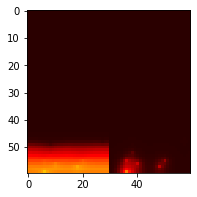

In [16]:
plt.figure(figsize=(20,3))
plt.imshow(np.flip(calcium[1].T, 0), vmin=0, vmax=1, cmap='hot')
plt.show()

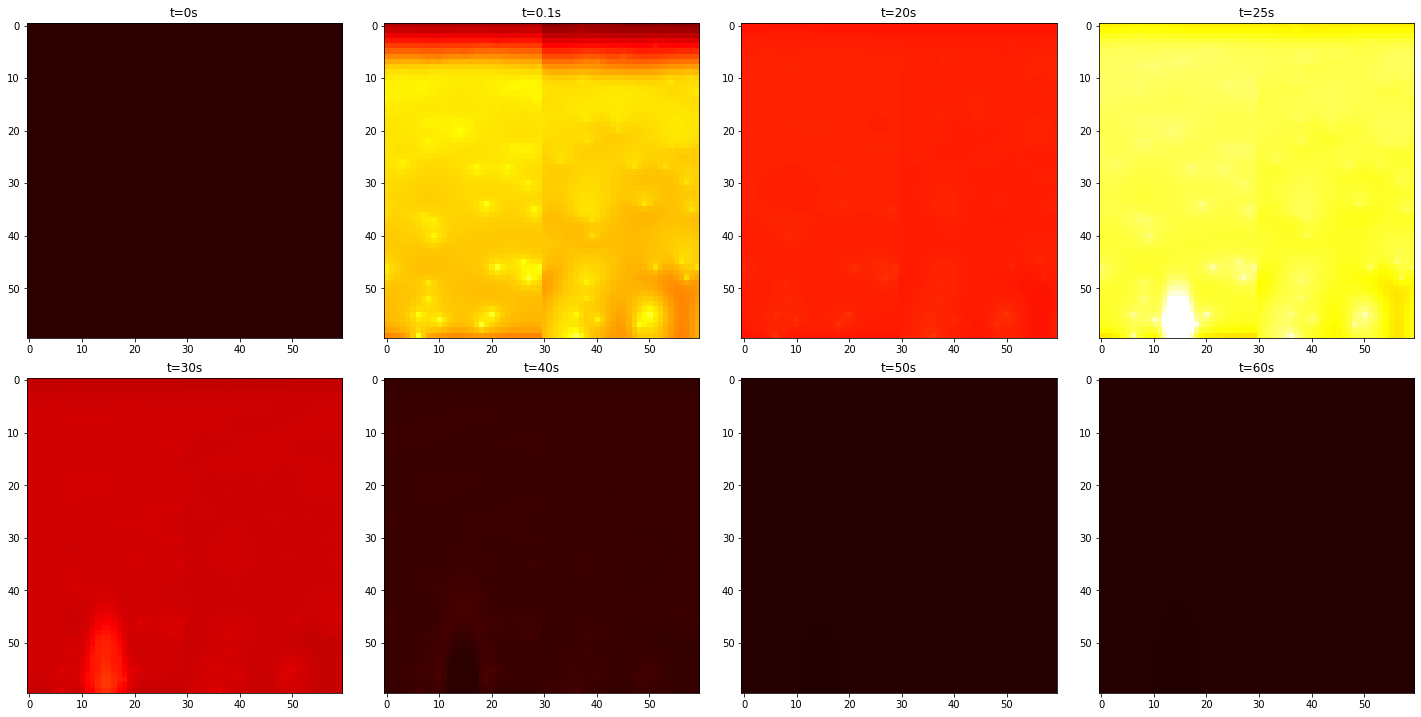

In [18]:
# Plot calcium patterns at specified times
plot.plot_frame_patterns(calcium, [0, 0.1, 20, 25, 30, 40, 50, 60], vmin=0, vmax=1, dt=0.02)

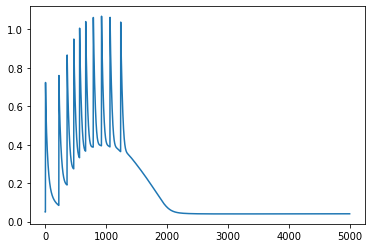

In [11]:
plt.plot(calcium[:, 15, 30])

In [ ]:
# Save video
data = calcium

NUMX = 100
NUMY = 100
DPI = 50
FPS = 200
SAVEPATH = './results/video/calcium/'

plt.figure(figsize=(NUMX/DPI, NUMY/DPI))

for iframe in tqdm(range(len(data))):

    plt.clf()

    frame = data[iframe]
    # if flip:
    #     frame = np.flip(frame.T, 0)

    plt.imshow(frame.T, cmap='hot', vmin=0, vmax=2)

    plt.axis('off')

    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())

    plt.xlim(0, NUMX)
    plt.ylim(0, NUMY)
    plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0, wspace=0)
    plt.margins(0, 0)

    plt.savefig(SAVEPATH + 'frames/img' + str(iframe) + '.jpg', dpi=DPI)

# Save video
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
videoWriter = cv2.VideoWriter(SAVEPATH + '/' + FILENAME + '.avi', fourcc, FPS, (NUMX, NUMY))

for iframe in tqdm(range(len(data))):
    frame = cv2.imread(SAVEPATH + 'frames/img' + str(iframe) + '.jpg')
    videoWriter.write(frame)
videoWriter.release()
cv2.destroyAllWindows()